In [373]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Linear Regression

In [374]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

In [375]:
from quantnoob.getdata import getPandaCsv, getTrainTest

In [376]:
symbol = 'EURUSD'
ori_path = '/Users/ballmdr/blockchain-python/backtrader'

In [377]:
df = getPandaCsv(ori_path, symbol, '1440')

In [378]:
df.index = df['date']

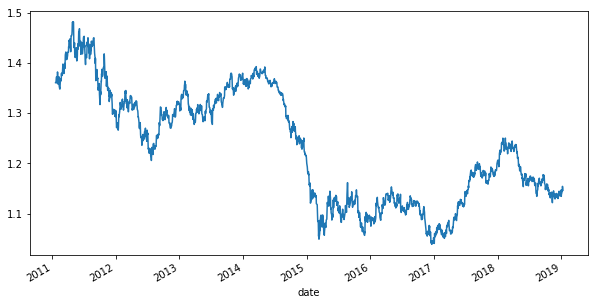

In [379]:
df['close'].plot(figsize=(10,5))

In [169]:
from datetime import datetime
trainfrom = datetime(2011,1,1)
trainto = datetime(2015,12,31)
testfrom = datetime(2016,1,1)
testto = datetime(2017,12,31)
X_columns = ['open', 'high', 'low', 'close', 'volume']
y_columns = 'close'

In [170]:
X_train, y_train, X_test, y_test = getTrainTest(df=df, trainfrom=trainfrom, trainto=trainto, testfrom=testfrom, testto=testto, X_columns=X_columns, y_columns=y_columns)

/anaconda2/envs/oanda_v20/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [173]:
X_train.head()

,open,high,low,close,volume
date,,,,,
2011-01-21,1.34714,1.36237,1.34477,1.36133,65007
2011-01-24,1.36412,1.36847,1.35394,1.36364,74314
2011-01-25,1.36368,1.37032,1.35723,1.36813,82239
2011-01-26,1.36813,1.37204,1.36402,1.37111,68867
2011-01-27,1.37118,1.37574,1.36362,1.37319,80975


In [10]:
lm = LinearRegression()

In [11]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
y_pred = lm.predict(X_test)

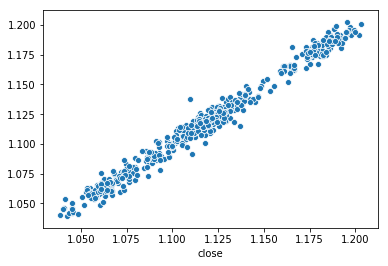

In [13]:
sns.scatterplot(y_test, y_pred)

## Logistic Regression

In [380]:
from sklearn.linear_model import LogisticRegression

In [385]:
import numpy as np

In [434]:
df['MA'] = df['close'].rolling(25).mean()
df['MA2'] = df['close'].rolling(50).mean()
df['MA3'] = df['close'].rolling(200).mean()

In [437]:
df.iloc[200:]

,date,time,open,high,low,close,volume,MA,MA2,Std,MA3
date,,,,,,,,,,,
2011-10-28,2011-10-28,00:00,1.41880,1.41999,1.41330,1.41464,101909,1.368180,1.384682,0.026833,1.410109
2011-10-31,2011-10-31,00:00,1.41406,1.41703,1.38280,1.38562,113437,1.369474,1.383680,0.023698,1.410219
2011-11-01,2011-11-01,00:00,1.38534,1.38703,1.36075,1.37006,134849,1.369934,1.382202,0.021748,1.410229
2011-11-02,2011-11-02,00:00,1.36996,1.38275,1.36358,1.37464,124710,1.370749,1.380868,0.019346,1.410246
2011-11-03,2011-11-03,00:00,1.37466,1.38539,1.36560,1.38219,129719,1.371652,1.379757,0.017445,1.410291
2011-11-04,2011-11-04,00:00,1.38235,1.38672,1.37103,1.37897,108966,1.373270,1.378340,0.014157,1.410383
2011-11-07,2011-11-07,00:00,1.38204,1.38303,1.36806,1.37741,108111,1.375664,1.376868,0.013518,1.410424
2011-11-08,2011-11-08,00:00,1.37740,1.38456,1.37238,1.38321,105403,1.377600,1.375651,0.012681,1.410426
2011-11-09,2011-11-09,00:00,1.38352,1.38584,1.35227,1.35410,127218,1.378375,1.373996,0.014389,1.410292


In [471]:
X = df.iloc[200:,7:11]

In [477]:
close = df.iloc[200:,5:6]
close.head()

,close
date,
2011-10-28,1.41464
2011-10-31,1.38562
2011-11-01,1.37006
2011-11-02,1.37464
2011-11-03,1.38219


In [472]:
X.head()

,MA,MA2,Std,MA3
date,,,,
2011-10-28,1.368180,1.384682,0.026833,1.410109
2011-10-31,1.369474,1.383680,0.023698,1.410219
2011-11-01,1.369934,1.382202,0.021748,1.410229
2011-11-02,1.370749,1.380868,0.019346,1.410246
2011-11-03,1.371652,1.379757,0.017445,1.410291


In [496]:
y = close['close']
y[:10]

date
2011-10-28    1.41464
2011-10-31    1.38562
2011-11-01    1.37006
2011-11-02    1.37464
2011-11-03    1.38219
2011-11-04    1.37897
2011-11-07    1.37741
2011-11-08    1.38321
2011-11-09    1.35410
2011-11-10    1.36057
Name: close, dtype: float64

In [486]:
# ใส่คำตอบ ถ้า close พรุ่งนี้มากกว่าวันนี้ ให้เป็น 1 ถ้าน้อยกว่าให้เป็น -1
y = np.where(close['close'].shift(-1) > close['close'],1,-1)

In [487]:
y

array([-1, -1,  1, ..., -1, -1, -1])

In [497]:
split = int(0.7*len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [500]:
import seaborn as sns

In [516]:
lm = LinearRegression()
lm.fit(X_train, y_train)
close['predict'] = lm.predict(X)
close

,close,predict
date,,
2011-10-28,1.41464,1.346917
2011-10-31,1.38562,1.351303
2011-11-01,1.37006,1.353959
2011-11-02,1.37464,1.357347
2011-11-03,1.38219,1.360441
2011-11-04,1.37897,1.365614
2011-11-07,1.37741,1.370314
2011-11-08,1.38321,1.374330
2011-11-09,1.35410,1.375261


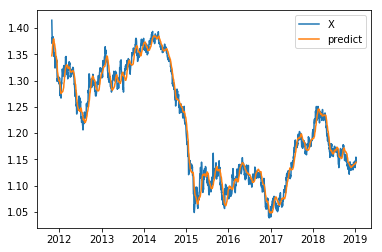

In [518]:
plt.plot(close['close'], label='X')
plt.plot(close['predict'], label='predict')
plt.legend()
plt.show();

In [505]:
lm = LogisticRegression()
lm.fit(X_train, y_train)

/anaconda2/envs/oanda_v20/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Unknown label type: 'continuous'

In [503]:
print(lm.coef_)

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [491]:
X.columns

Index(['MA', 'MA2', 'Std', 'MA3'], dtype='object')

In [492]:
y_pred = lm.predict(X_test)
print(y_pred)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

In [458]:
from sklearn import metrics

In [459]:
print(metrics.confusion_matrix(y_test, y_pred))

[[200   0]
 [221   0]]


In [460]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.48      1.00      0.64       200
           1       0.00      0.00      0.00       221

   micro avg       0.48      0.48      0.48       421
   macro avg       0.24      0.50      0.32       421
weighted avg       0.23      0.48      0.31       421



/anaconda2/envs/oanda_v20/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda2/envs/oanda_v20/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda2/envs/oanda_v20/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [461]:
print(lm.score(X_test, y_test))

0.4750593824228028


In [462]:
from sklearn.model_selection import cross_val_score

In [463]:
cross_val = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)

/anaconda2/envs/oanda_v20/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda2/envs/oanda_v20/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda2/envs/oanda_v20/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda2/envs/oanda_v20/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda2/envs/oanda_v20/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be ch

In [464]:
print(cross_val)

[0.5026738  0.5026738  0.5026738  0.5026738  0.5026738  0.5026738
 0.49197861 0.45989305 0.5026738  0.50537634]


In [465]:
print(cross_val.mean())

0.497596457938014


In [466]:
df['Predicted_Signal'] = lm.predict(X)

ValueError: Length of values does not match length of index

In [467]:
df['symbol_returns'] = np.log(df['close']/df['close'].shift(1))

In [468]:
cum_symbol_returns = np.cumsum(df[split:]['symbol_returns'])
df['Strategy_returns'] = df['symbol_returns'] * df['Predicted_Signal'].shift(1)

KeyError: 'Predicted_Signal'

In [469]:
cum_strategy_returns = np.cumsum(df[split:]['Strategy_returns'])

KeyError: 'Strategy_returns'

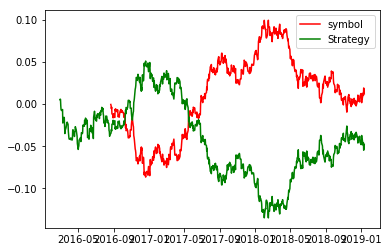

In [470]:
plt.plot(cum_symbol_returns, color='r', label='symbol')
plt.plot(cum_strategy_returns, color='g', label='Strategy')
plt.legend()
plt.show()